In [3]:
# from ultralytics import YOLO

In [1]:
from utils.helper import img_to_encoding

In [2]:
import json
import requests
import numpy as np
from PIL import Image

from PIL import Image
import matplotlib.pyplot as plt

def display_image_with_title(image_path, title):
  """
  Displays a Pillow image with a title using Matplotlib.

  Args:
      image_path: Path to the image file.
      title: The title to be displayed.
  """

  # Open the image with Pillow
  img = Image.open(image_path)

  # Convert image to RGB format (required for Matplotlib)
  img_rgb = img.convert("RGB")

  # Create a figure for plotting
  fig, ax = plt.subplots()

  # Display the image
  ax.imshow(img_rgb)
  ax.axis("off")  # Hide axes for cleaner presentation

  # Add title as text annotation
  plt.title(title, fontsize=16, ha="center")  # Center-aligned title

  # Display the plot
  plt.show()

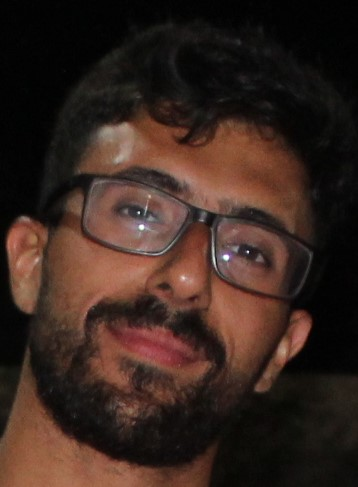

In [11]:
img

In [10]:
img=Image.open("../../../../as.jpg")

In [12]:
# Convert the image to a 3D array (RGB format)
image_array = np.array(img)

# Convert the array to a list (to be JSON serializable)
image_list = image_array.tolist()

# Prepare JSON payload
payload = {
           'image': image_list, 
           'identity':"rrrr"
        }
json_payload = json.dumps(payload)

# Send HTTP POST request
url = "http://127.0.0.1:5000/imageVerification"  # Replace with your API endpoint
response = requests.get(url, json=json_payload)

if response.status_code == 200:
    display_image_with_title("../testingPhotos/a.jpeg",response.text )
    
    print(response.text)
else:
    print("Error:", response.status_code)

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

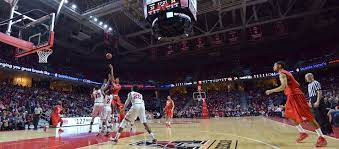

In [9]:
img

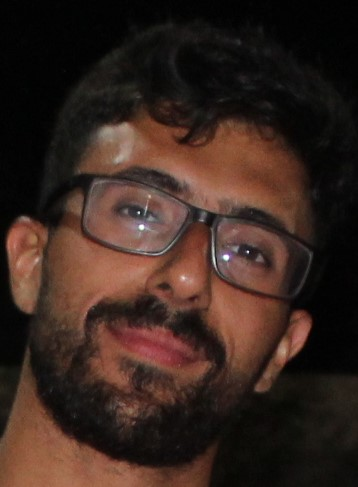

In [13]:
img

In [15]:
# Convert the image to a 3D array (RGB format)
image_array = np.array(img)

# Convert the array to a list (to be JSON serializable)
image_list = image_array.tolist()

# Prepare JSON payload
payload = {
           'image': image_list, 
           'identity':"andrew"
        }
json_payload = json.dumps(payload)

# Send HTTP POST request
url = "http://127.0.0.1:5000/embeddingCreation"  # Replace with your API endpoint
response = requests.post(url, json=json_payload)

In [17]:
import os
start_dir=".."

In [18]:
os.getcwd()

'c:\\Users\\user\\Desktop\\miniProject\\webApps\\arduinoBackend\\AiFiles'

In [19]:


for root, dirs, files in os.walk(start_dir):
    if 'encoding.json' in files:
        encoding_json_path = os.path.join(root, 'encoding.json')
        with open(encoding_json_path, 'r') as f:
            data = json.load(f)

In [20]:
data.keys()

dict_keys(['andrew', 'arnaud', 'daher', 'identity'])

In [44]:
encoding=img_to_encoding(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 798ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


In [55]:
for root, dirs, files in os.walk(start_dir):
    if 'encoding.json' in files:
        print("sd")
        encoding_json_path = os.path.join(root, 'encoding.json')
        with open(encoding_json_path, 'w') as f:
          json.dump(data,f)

sd


In [52]:
data.keys()

dict_keys(['aadaher', 'andrew'])

In [47]:
data['andrew']=encoding.tolist()

In [48]:
data.keys()

dict_keys(['aadaher', 'andrew'])

In [19]:
a=data['andrew']

In [23]:
np.array(a).shape

(1, 512)

In [ ]:
# Load the image
image_paths = ["./AiFiles/testingPhotos/a.jpeg","./AiFiles/testingPhotos/b.jpeg","./AiFiles/testingPhotos/c.jpeg"]

for image_path in image_paths:
    # Replace with the path to your image
    image = Image.open(image_path)
    
    # Convert the image to a 3D array (RGB format)
    image_array = np.array(image)
    
    # Convert the array to a list (to be JSON serializable)
    image_list = image_array.tolist()
    
    # Prepare JSON payload
    payload = {
               'image': image_list, 
               'identity':"daher"
            }
    json_payload = json.dumps(payload)
    
    # Send HTTP POST request
    url = "http://127.0.0.1:5000/imageVerification"  # Replace with your API endpoint
    response = requests.get(url, json=json_payload)
    
    if response.status_code == 200:
        display_image_with_title(image_path,response.text )

        
        print(response.text)
    else:
        print("Error:", response.status_code)

In [8]:
for root, dirs, files in os.walk("."):
    if 'encoding.json' in files:
        print("sd")
        encoding_json_path = os.path.join(root, 'encoding.json')
        with open(encoding_json_path, 'r') as f:
          data=json.load(f)

sd


dict_keys(['andrew', 'arnaud', 'daher'])